## Name: David Geng

## Unsupervised Learning: Cluster Analysis using K-Means

### Loading Libraries

In [1]:
# importing the packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns

### Loading Data

In [2]:
# # importing data
# from google.colab import files
# upload = files.upload()

In [3]:
# read the dataset
df = pd.read_csv('customers.csv')

In [4]:
# viewing top rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# using describe function
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# dropping Channel and Region
df = df.iloc[:, 2:]

In [8]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


## K-Means Clustering Analysis

In [9]:
# standardization the variable
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head(8)

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601


In [10]:
# computing k-means clustering
kmeans = KMeans(n_clusters = 5, random_state = 0)
k_pred = kmeans.fit(df_scaled)
k_pred

KMeans(n_clusters=5, random_state=0)

In [11]:
# cluster centroids
df_cluster = pd.DataFrame(k_pred.cluster_centers_, columns = df.columns)
pd.set_option('display.precision', 3)
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.670,-0.108,-0.250,1.094,-0.418,0.259
1,-0.483,0.687,0.930,-0.320,0.913,0.161
2,1.967,5.176,1.287,6.901,-0.555,16.478
3,-0.238,-0.380,-0.430,-0.168,-0.391,-0.196
4,0.314,3.922,4.276,-0.004,4.618,0.503


<AxesSubplot:ylabel='Fresh'>

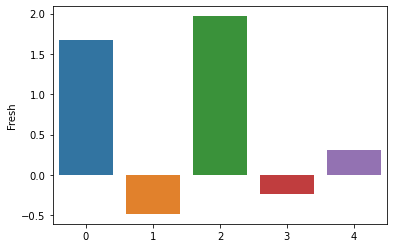

In [12]:
# Fresh
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Fresh')

<AxesSubplot:ylabel='Milk'>

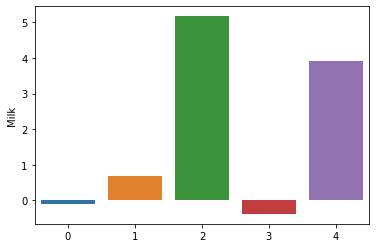

In [13]:
# Milk
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Milk')

<AxesSubplot:ylabel='Grocery'>

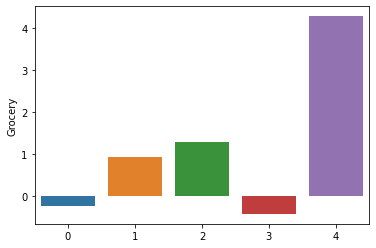

In [14]:
# HW Grocery
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Grocery')

<AxesSubplot:ylabel='Frozen'>

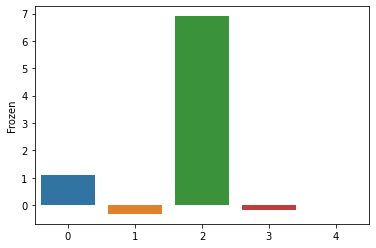

In [15]:
# HW Frozen
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Frozen')

<AxesSubplot:ylabel='Detergents_Paper'>

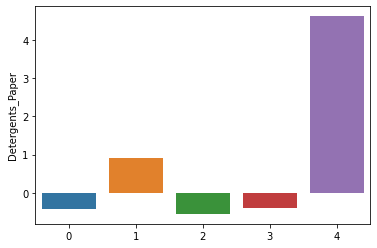

In [16]:
# HW Detergents_Paper
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Detergents_Paper')

<AxesSubplot:ylabel='Delicassen'>

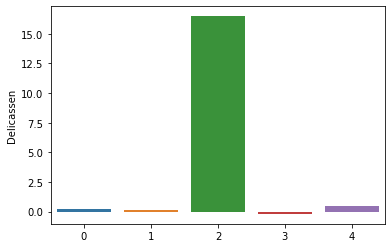

In [17]:
# HW Delicassen
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Delicassen')

### Choosing K: Elbow Method

In [18]:
# Computing inertia
distortions = []
K = range(2, 10)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

In [19]:
print(distortions)

[1954.647761155288, 1621.2979567848224, 1317.8655159655098, 1060.9989740147735, 915.5134316108552, 822.9764291813023, 743.1956628908983, 674.0337049175125]


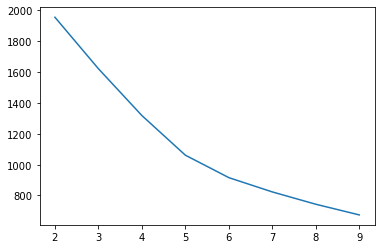

In [20]:
# plot inertia
plt.plot(K, distortions)